<a href="https://colab.research.google.com/github/keinam53/Machine_learning/blob/main/Uczenie_nienadzorowane/4_Detekcja_anomalii/3_Szeregi_czasowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Detekcja anomalii w szeregach czasowych
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Przygotowanie danych](#3)
5. [Prophet - budowa modelu](#4)
6. [Wizualizacja działania modelu](#5)
7. [Budowa modelu - wrzesień](#6)


### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import fbprophet

np.random.seed(41)
fbprophet.__version__

'0.7.1'

### <a name='1'></a> Załadowanie danych

In [2]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv', 
                 parse_dates=['timestamp'])
df.head()

,timestamp,count
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14398 non-null  datetime64[ns]
 1   count      14398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


### <a name='2'></a> Wizualizacja danych

In [4]:
px.line(df, x='timestamp', y='count', title='Detekcja anomalii w szeregach czasowych', width=950, height=500,
        template='plotly_dark', color_discrete_sequence=['#42f5d4'])

In [5]:
px.scatter(df, x='timestamp', y='count', title='Detekcja anomalii w szeregach czasowych', width=950, height=500,
        template='plotly_dark', color_discrete_sequence=['#42f5d4'])

### <a name='3'></a> Przygotowanie danych

Danymi wejściowymi do klasy Prophet jest obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn: 
* ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
* y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)


In [6]:
df.head(3)

,timestamp,count
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917


In [7]:
data = df.copy()
data.columns = ['ds', 'y']
data.head(3)

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917


### <a name='4'></a> Prophet - budowa modelu

In [8]:
from fbprophet import Prophet

Prophet?

In [9]:
model = Prophet(daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False, 
                interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [10]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-25 14:01:00,111.600106,132.797205,187.334256,111.600106,111.600106,48.864424,48.864424,48.864424,48.864424,48.864424,48.864424,0.0,0.0,0.0,160.464530
1,2018-09-25 14:02:00,111.601392,130.317007,191.563074,111.601392,111.601392,48.929051,48.929051,48.929051,48.929051,48.929051,48.929051,0.0,0.0,0.0,160.530443
2,2018-09-25 14:03:00,111.602678,135.528548,185.754231,111.602678,111.602678,48.990147,48.990147,48.990147,48.990147,48.990147,48.990147,0.0,0.0,0.0,160.592825


In [11]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,trend,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,111.600106,160.464530,132.797205,187.334256
1,2018-09-25 14:02:00,111.601392,160.530443,130.317007,191.563074
2,2018-09-25 14:03:00,111.602678,160.592825,135.528548,185.754231
3,2018-09-25 14:04:00,111.603964,160.651650,132.338786,192.261156
4,2018-09-25 14:05:00,111.605250,160.706892,133.412844,188.048425


In [12]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
lower = forecast['real'] < forecast['yhat_lower']
upper = forecast['real'] > forecast['yhat_upper']
forecast.loc[lower & upper, 'anomaly'] = 1
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,111.600106,132.797205,187.334256,111.600106,111.600106,48.864424,48.864424,48.864424,48.864424,48.864424,48.864424,0.0,0.0,0.0,160.464530,182.478,1
1,2018-09-25 14:02:00,111.601392,130.317007,191.563074,111.601392,111.601392,48.929051,48.929051,48.929051,48.929051,48.929051,48.929051,0.0,0.0,0.0,160.530443,176.231,1
2,2018-09-25 14:03:00,111.602678,135.528548,185.754231,111.602678,111.602678,48.990147,48.990147,48.990147,48.990147,48.990147,48.990147,0.0,0.0,0.0,160.592825,183.917,1
3,2018-09-25 14:04:00,111.603964,132.338786,192.261156,111.603964,111.603964,49.047686,49.047686,49.047686,49.047686,49.047686,49.047686,0.0,0.0,0.0,160.651650,177.798,1
4,2018-09-25 14:05:00,111.605250,133.412844,188.048425,111.605250,111.605250,49.101642,49.101642,49.101642,49.101642,49.101642,49.101642,0.0,0.0,0.0,160.706892,165.469,1


In [13]:
len(forecast[forecast['anomaly'] == -1])

0

In [14]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Detekcja anomalii w szeregach czasowych', template='plotly_dark', width=950, height=500)

In [15]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

,ds
0,2018-09-25 14:01:00
1,2018-09-25 14:02:00
2,2018-09-25 14:03:00
3,2018-09-25 14:04:00
4,2018-09-25 14:05:00
...,...
15833,2018-10-06 13:54:00
15834,2018-10-06 13:55:00
15835,2018-10-06 13:56:00
15836,2018-10-06 13:57:00


In [16]:
len(future)

15838

In [17]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,160.464530,132.005475,187.508861
1,2018-09-25 14:02:00,160.530443,132.580905,186.040238
2,2018-09-25 14:03:00,160.592825,133.721454,188.303464
3,2018-09-25 14:04:00,160.651650,132.025466,192.797461
4,2018-09-25 14:05:00,160.706892,131.985145,188.613172


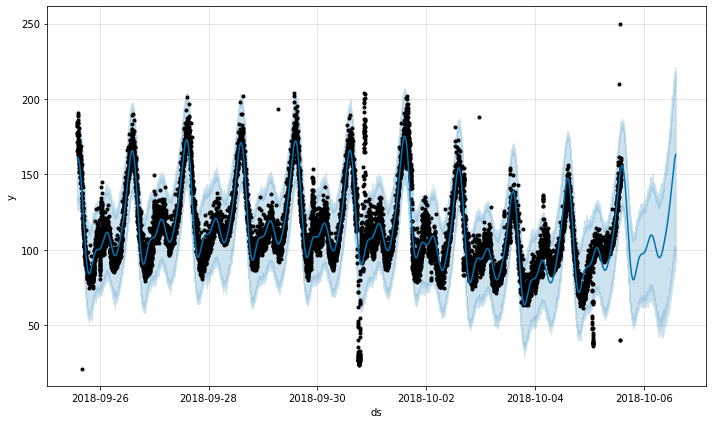

In [18]:
_ = model.plot(forecast)

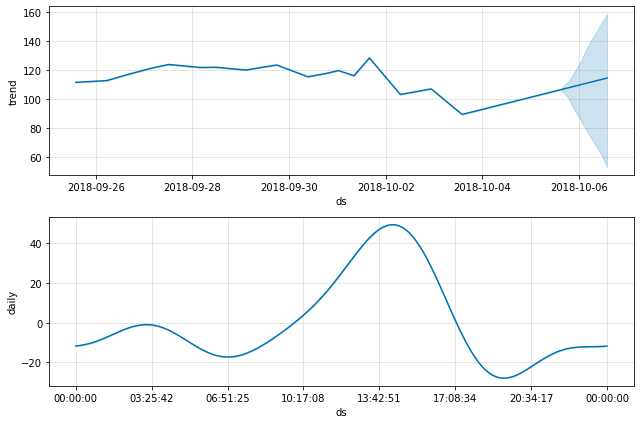

In [19]:
_ = model.plot_components(forecast)

In [20]:
from fbprophet.plot import plot_plotly

#plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')

<a name='6'></a> Budowa modelu - wrzesień

In [21]:
df_sep = df[df['timestamp'].dt.month == 9]
df_sep.columns = ['ds', 'y']
df_sep.head()

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469


In [22]:
len(df_sep)

7799

In [24]:
model = Prophet(daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=False, 
                interval_width=0.99, changepoint_range=0.8)

model.fit(df_sep)
forecast = model.predict(df_sep)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,164.366850,134.131140,193.380303
1,2018-09-25 14:02:00,164.414515,133.927314,195.558123
2,2018-09-25 14:03:00,164.458096,132.227739,191.884408
3,2018-09-25 14:04:00,164.497569,134.937250,198.196867
4,2018-09-25 14:05:00,164.532911,134.107812,198.191984


In [25]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
lower = forecast['real'] < forecast['yhat_lower']
upper = forecast['real'] > forecast['yhat_upper']
forecast.loc[lower & upper, 'anomaly'] = 1
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,112.048544,134.131140,193.380303,112.048544,112.048544,52.318307,52.318307,52.318307,52.318307,52.318307,52.318307,0.0,0.0,0.0,164.366850,182.478,1
1,2018-09-25 14:02:00,112.044574,133.927314,195.558123,112.044574,112.044574,52.369941,52.369941,52.369941,52.369941,52.369941,52.369941,0.0,0.0,0.0,164.414515,176.231,1
2,2018-09-25 14:03:00,112.040603,132.227739,191.884408,112.040603,112.040603,52.417492,52.417492,52.417492,52.417492,52.417492,52.417492,0.0,0.0,0.0,164.458096,183.917,1
3,2018-09-25 14:04:00,112.036633,134.937250,198.196867,112.036633,112.036633,52.460936,52.460936,52.460936,52.460936,52.460936,52.460936,0.0,0.0,0.0,164.497569,177.798,1
4,2018-09-25 14:05:00,112.032663,134.107812,198.191984,112.032663,112.032663,52.500248,52.500248,52.500248,52.500248,52.500248,52.500248,0.0,0.0,0.0,164.532911,165.469,1


In [27]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future.head()

,ds
0,2018-09-25 14:01:00
1,2018-09-25 14:02:00
2,2018-09-25 14:03:00
3,2018-09-25 14:04:00
4,2018-09-25 14:05:00


In [28]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,164.366850,133.708981,194.315264
1,2018-09-25 14:02:00,164.414515,136.828816,194.528120
2,2018-09-25 14:03:00,164.458096,134.362967,194.941763
3,2018-09-25 14:04:00,164.497569,134.048345,195.154798
4,2018-09-25 14:05:00,164.532911,136.362659,194.869250


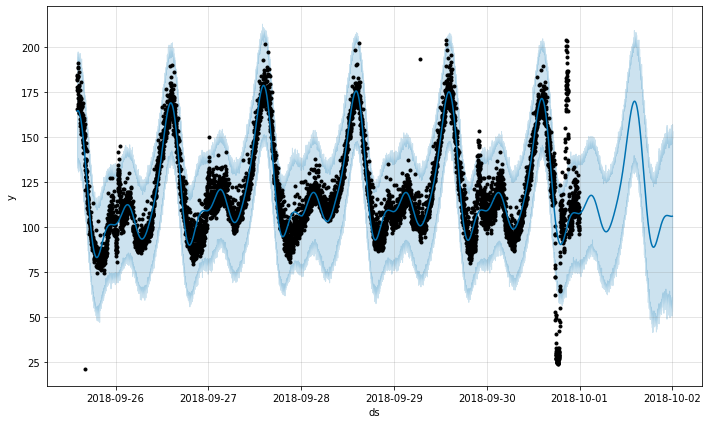

In [29]:
_ = model.plot(forecast)

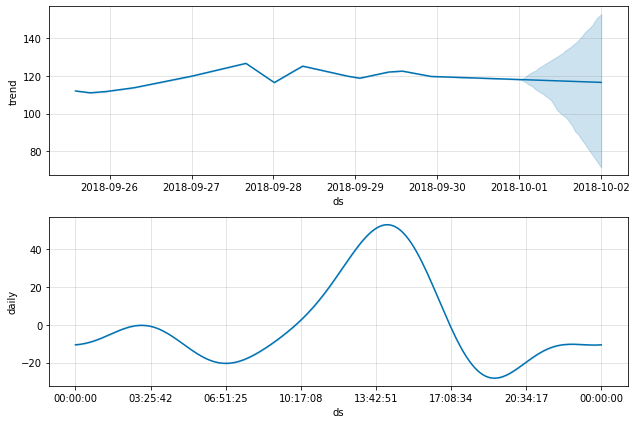

In [30]:
_ = model.plot_components(forecast)